In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from packages import general, bh, fmm

In [2]:
num_particles = 100

particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

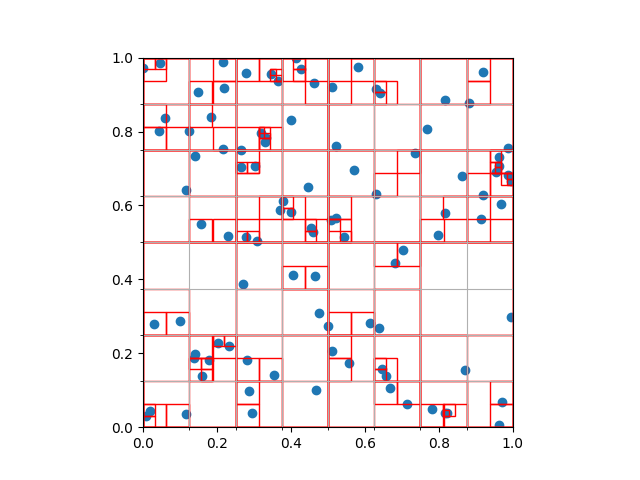

In [3]:
bh_tree_print = bh.BH(particles, 0.5)
bh_tree_print.root.create_tree()
bh_tree_print.plot(fmm_grid=True)

In [4]:
general.pairwise.potentials(particles, zero_potentials=True)
dir_pots = np.array([particle.direct_potential for particle in particles])

In [5]:
thetas = np.linspace(0, 0.5, 50)
n_crit = 2

bh_errs = []
bh_fracs = []

for theta in thetas:
    print(f'Theta: {theta}')
    bh_method = bh.BH(particles, theta, n_crit)
    bh_method.do_bh(zero_potentials=True)
    pots = np.array([particle.potential for particle in particles])
    err = pots - dir_pots
    bh_errs.append(err)
    frac = np.abs(err / dir_pots)
    bh_fracs.append(frac)

Theta: 0.0
Theta: 0.01020408163265306
Theta: 0.02040816326530612
Theta: 0.030612244897959183
Theta: 0.04081632653061224
Theta: 0.0510204081632653
Theta: 0.061224489795918366
Theta: 0.07142857142857142
Theta: 0.08163265306122448
Theta: 0.09183673469387754
Theta: 0.1020408163265306
Theta: 0.11224489795918366
Theta: 0.12244897959183673
Theta: 0.13265306122448978
Theta: 0.14285714285714285
Theta: 0.1530612244897959
Theta: 0.16326530612244897
Theta: 0.17346938775510204
Theta: 0.18367346938775508
Theta: 0.19387755102040816
Theta: 0.2040816326530612
Theta: 0.21428571428571427
Theta: 0.22448979591836732
Theta: 0.2346938775510204
Theta: 0.24489795918367346
Theta: 0.25510204081632654
Theta: 0.26530612244897955
Theta: 0.2755102040816326
Theta: 0.2857142857142857
Theta: 0.29591836734693877
Theta: 0.3061224489795918
Theta: 0.31632653061224486
Theta: 0.32653061224489793
Theta: 0.336734693877551
Theta: 0.3469387755102041
Theta: 0.3571428571428571
Theta: 0.36734693877551017
Theta: 0.37755102040816324


In [6]:
precisions = np.arange(2, 40, dtype=int)

fmm_errs = []
fmm_fracs = []

for precision in precisions:
    print(f'Precision: {precision}')
    fmm_method = fmm.FMM(particles, precision)
    fmm_method.do_fmm(zero_potentials=True)
    pots = np.array([particle.potential for particle in particles])
    err = pots - dir_pots
    fmm_errs.append(err)
    frac = np.abs(err / dir_pots)
    fmm_fracs.append(frac)

Precision: 2
Precision: 3
Precision: 4
Precision: 5
Precision: 6
Precision: 7
Precision: 8
Precision: 9
Precision: 10
Precision: 11
Precision: 12
Precision: 13
Precision: 14
Precision: 15
Precision: 16
Precision: 17
Precision: 18
Precision: 19
Precision: 20
Precision: 21
Precision: 22
Precision: 23
Precision: 24
Precision: 25
Precision: 26
Precision: 27
Precision: 28
Precision: 29
Precision: 30
Precision: 31
Precision: 32
Precision: 33
Precision: 34
Precision: 35
Precision: 36
Precision: 37
Precision: 38
Precision: 39


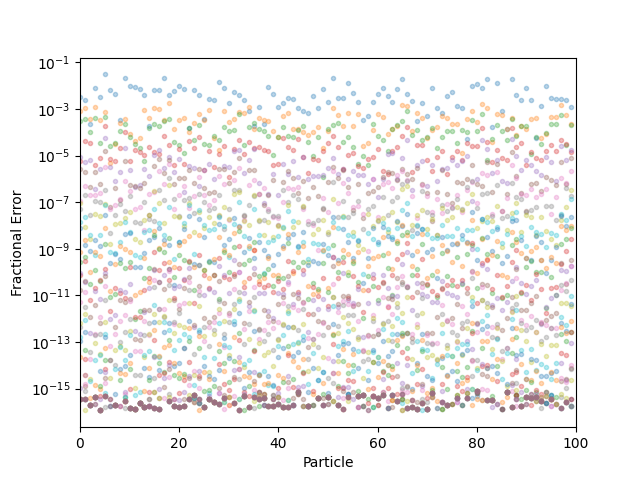

In [7]:
fig, ax = plt.subplots()
for i, precision in enumerate(precisions):
    ax.plot(fmm_fracs[i], '.', alpha = 0.3, label=str(precision))
ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')

plt.show()

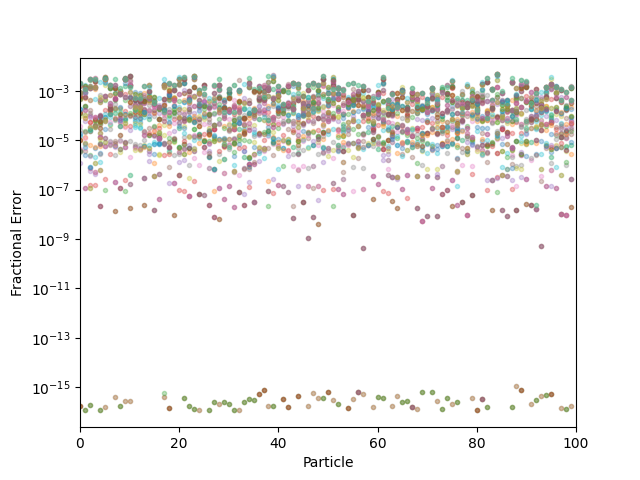

In [13]:
fig, ax = plt.subplots()
for i, theta in enumerate(thetas):
    ax.plot(bh_fracs[i], '.', alpha = 0.3, label=str(theta))
ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')

plt.show()

In [9]:
fmm_averages = [np.average(frac) for frac in fmm_fracs]
fmm_stdevs = [np.std(frac) for frac in fmm_fracs]
fmm_mins = [np.min(frac) for frac in fmm_fracs]
fmm_maxs = [np.max(frac) for frac in fmm_fracs]

bh_averages = [np.average(frac) for frac in bh_fracs]
bh_stdevs = [np.std(frac) for frac in bh_fracs]
bh_mins = [np.min(frac) for frac in bh_fracs]
bh_maxs = [np.max(frac) for frac in bh_fracs]

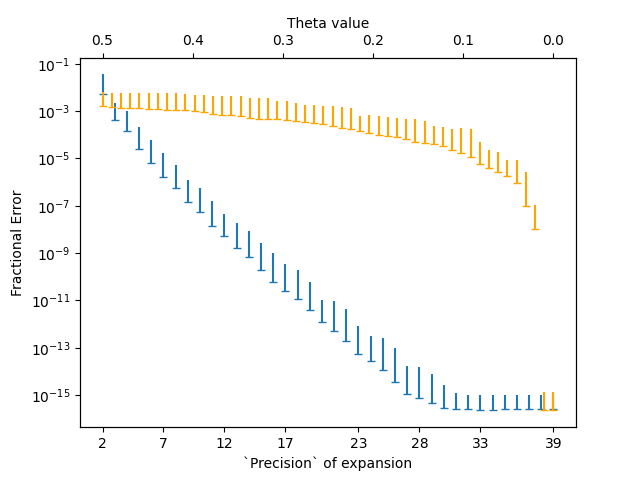

In [10]:
fig, ax1 = plt.subplots()

# ax1.set_title('Fractional Error for the collection of 10000 Particles as dependant on the `precision` value used', wrap=True)

ax2 = ax1.twiny()
ax2.invert_xaxis()

ax1.errorbar(precisions, fmm_averages, (fmm_mins, fmm_maxs), fmt='_', label='FMM')
ax2.errorbar(thetas, bh_averages, (bh_mins, bh_maxs), fmt='_', color='orange', label='BH')

ax1.set_yscale('log')

integer_ticks = np.linspace(precisions[0], precisions[-1], 8, endpoint=True, dtype=int)
ax1.set_xticks(integer_ticks)

ax1.set_xlabel('`Precision` of expansion')
ax2.set_xlabel('Theta value')
ax1.set_ylabel('Fractional Error')

# ax1.legend()
# ax2.legend()

plt.show()